# For each
- formulate a null and alternative hypothesis (be as specific as you can be)
-  give an example of what a true positive, true negative, type I and type II errors would look like

*NOTE:* Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

# 1
Has the network latency gone up since we switched internet service providers?

- Null Hypothesis: Internet latency has gone up since we switched internet services.
- Alternative Hypothesis: the internet is the same or worst as before.
- Ture Positive: Latency should have gone up with the new provider. The new provider increased latency. 
- True Negative:  Latency should have gone up with the new provider. Latency has stated the same.
- Type 1 error: Latency went up with the new provider. We don't think it is the new provider.
- Type 2 error: Latancy has stated the same after the new switch. The new provider has increased latency. 

# 2
Is the website redesign any good?

- Null Hypothesis: Customers stay longer on the website
- Alternative Hypothesis: people spend the same amount of time on the website as before
- Ture Positive: New page should increase time on our website. It did.  
- True Negative: New page should increase time on our website. It did not.
- Type 1 error: The page does not make customers stay longer on the website. It did
- Type 2 error: Customers remain longer on the website. The new website had nothing to do with it. 

# 3

Is our television ad driving more sales?

- Null Hypothesis: The item sold has seen a three percent increase in sales after Super Bowl add
- Alternative Hypothesis:  After the Super Bowl add, the product saw an increase of 1% or less
- Ture Positive:  Sales have increased 4%. We believe it is because of the Super Bowl ad.
- True Negative: Item sold has seen an increase of sales 5%. Add has not had its day view on tv 
- Type 1 error: Sales have gone up over 3% since the commercial. We think that sales don't have anything to do with commercials.
- Type 2 error: The item sold did not see a three percent increase, but we think that the commercial is driving sales of the product

-----------------------------
<br><br><br>


# T-Test 
<br><br>

In [1]:
# Get imports
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data

# T-Test 1
Ace Realty wants to determine `whether the average time it takes to sell homes is different for its two offices`. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 
15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

$t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$

Where $s_p$ is the pooled standard deviation, and is given by:

$s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 -2}}$





In [2]:
# Data to pandas data frame
office_data = [{"office": 1, "μ" : 90, "σ" : 15, "n_sales" : 40},
               {"office": 2, "μ" : 100, "σ" : 20, "n_sales" : 50}] #days #days

df = pd.DataFrame(office_data)
df

,office,μ,σ,n_sales
0,1,90,15,40
1,2,100,20,50


In [3]:
# Two Sample T-test
# H_0 = There is NO difference in average time it takes for the offices to sell homes.
# H_1 = There IS difference in average time it takes for the offices to sell homes.
a = 0.05 #level of significance 

# x1 = 
# x2 = 

#df[df.μ==df[2][μ]]
t_n_p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t_n_p


Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

In [4]:
f"Because the p-value ({t_n_p[1]}) is less than alpha value ({a}),we reject the null hypothesis"

'Because the p-value (0.00811206270346016) is less than alpha value (0.05),we reject the null hypothesis'

# T-Test  2
##### Load the mpg dataset and use it to answer the following questions:

In [5]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## 2.1
##### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

1. Plot distrubution 
2. Establish Hypothesis
3.  $\alpha$ = 0.05
4. Verify assumtion:
    - More than 30 observations
    - Independdent samples 
    - Equal Variance (set argument to False if not)

5. Compute test statistcs and probability (t-statistics & p-value) using `stats.ttest_ind`
6. Deside

In [6]:
# Harmonig mean is appropiate if the data values are ratios
mpg["avg_fuel"] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [7]:
ave_2008 = mpg[mpg.year == 2008].avg_fuel
ave_1999 = mpg[mpg.year == 1999].avg_fuel

## 2.1.1 
Plot distrubution

<AxesSubplot:>

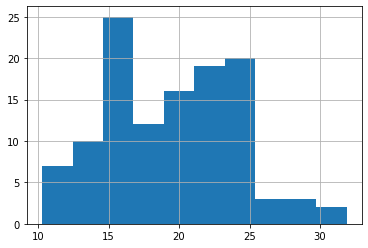

In [8]:
ave_2008.hist()

<AxesSubplot:>

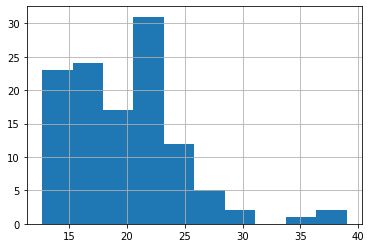

In [9]:
ave_1999.hist() 

## 2.1.2
Establish Hypothesis

* 2-sample: Data come from 2 subgroups 
* 2-tailed: Comparing mean provavility 

$H_0$ = There is NO difference in average fule consumption between 2008 and 2019 vehicles 


$H_a$ = There IS difference in average fule consumption between 2008 and 2019 vehicles 

## 2.1.3

In [10]:
alpha = 0.05

## 2.1.4
Verify assumtion:
   - More than 30 observations (✓)
   - Independdent samples (✓)
   - Equal Variance (✕) (set argument to False if not)

In [11]:
ave_2008.var() == ave_1999.var()

False

## 2.1.5 
Compute test statistcs and probability (t-statistics & p-value) using stats.ttest_ind

In [12]:
t_n_p = stats.ttest_ind(ave_2008, ave_1999, equal_var=False)
t_n_p

Ttest_indResult(statistic=-0.3011962975077886, pvalue=0.7635358418225436)

## 2.1.6

In [13]:
f'''Because p ({round(t_n_p[1], 3)}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.'''

'Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.'

## 2.2
#### Are compact cars more fuel-efficient than the average car?

1. Plot distrubution 
2. Establish Hypothesis
3.  $\alpha$ = 0.05
4. Verify assumtion:
    - More than 30 observations
    - Independdent samples 
    - Equal Variance (set argument to False if not)

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`.
6. Deside. For a 1-tailed test, we evaluate $p/2 &lt; \alpha$ and $t &gt; 0$ (to test if higher), and of a less-than test when $p/2 &lt; $\alpha$ and $t &lt; 0$.

In [14]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [15]:
compact = mpg[mpg['class'] == 'compact']
compact.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


## 2.2.1
Plot distrubution

<AxesSubplot:>

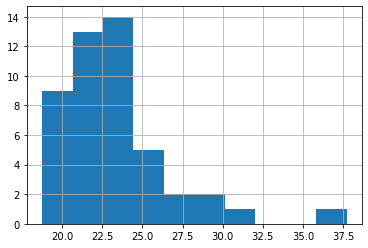

In [16]:
compact.avg_fuel.hist()

## 2.2.2
Establish Hypothesis

##### Are compact cars more fuel-efficient than the average car?

* 2-sample: Data come from 2 subgroups 
* 1-tailed: Comparing mean higher than

$H_0$ = compact cars have <= fuel efficiency than the average car 



$H_a$ = compact cars have > fuel efficincy than the average car 

## 2.2.3

In [17]:
𝛼  = 0.05

## 2.2.4
Verify assumtion:
   - More than 30 observations (✓)
   - Independdent samples (✓)
   - Equal Variance (✕) (set argument to False if not)

In [18]:
# More than 30 observations
compact.shape[0]

47

In [19]:
compact.avg_fuel.var()

12.763933193960233

In [20]:
mpg['avg_fuel'].var()

24.106173930122633

## 2.2.5
Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp.`

In [21]:
µ = mpg["avg_fuel"].mean()
µ

19.585525317633177

In [22]:
t, p = stats.ttest_1samp(compact.mean(), µ)
t, p, 𝛼

(0.9883981601782644, 0.3683444543064755, 0.05)

6. Deside

#### Do manual cars get better gas mileage than automatic cars?

# Correlation 

# 1
Use the telco_churn data. Does tenure correlate with monthly charges?

Total charges?

What happens if you control for phone and internet service?

# 2
Use `employees` database

- Is there a relationship between how long an employee has been with the company and their salary?

In [23]:
from env import host, user, password

def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

sql = """
    SELECT * from employees limit 3000
"""

# Called the "Connection string" b/c it has all the info to connect
url = get_db_url("employees")
df = pd.read_sql(sql, url)
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

# 3
Use the sleepstudy data.
- Is there a relationship between days and reaction time?

# Chi Square ----> $\chi2$

# 1
Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [24]:
index = ['Uses a Macbook', "Doesn't Use A Macbook"]
columns = ['Codeup Student	', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
# n = observed.values.sum()
observed

,Codeup Student\t,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [25]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f"degf   = {degf: .2f}")

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000
degf   =  1.00


In [26]:
if p < alpha:
    print("We reject the hypothesis. There is association.")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis. There is association.


# 2
Choose another 2 categorical variables from the `mpg` dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [27]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [28]:
# pandas crosstab to make a 'contingency' table
observed = pd.crosstab(mpg.manufacturer, mpg.trans)
observed.tail()

trans,auto(av),auto(l3),auto(l4),auto(l5),auto(l6),auto(s4),auto(s5),auto(s6),manual(m5),manual(m6)
manufacturer,,,,,,,,,,
nissan,3,0,3,1,0,0,1,0,3,2
pontiac,0,0,4,0,0,1,0,0,0,0
subaru,0,0,5,0,0,2,0,0,7,0
toyota,0,1,11,4,0,0,2,2,13,1
volkswagen,0,0,5,2,0,0,0,6,11,3



- $H_0$: There is no relation between the car maker and transmission  (independence)
- $H_a$: There is an association between the car maker and transmission

In [29]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.20f}')
print(f"dgf   = {degf: .2f}")

Observed

[[ 2  0  0  5  0  0  0  4  4  3]
 [ 0  0 14  0  0  0  0  2  0  3]
 [ 0  1 16 11  2  0  0  0  3  4]
 [ 0  0 10  5  2  0  0  0  7  1]
 [ 0  0  2  2  0  0  0  0  4  1]
 [ 0  0  6  1  0  0  0  0  6  1]
 [ 0  0  2  6  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  2  0  0]
 [ 0  0  2  0  1  0  0  0  0  0]
 [ 0  0  1  2  1  0  0  0  0  0]
 [ 3  0  3  1  0  0  1  0  3  2]
 [ 0  0  4  0  0  1  0  0  0  0]
 [ 0  0  5  0  0  2  0  0  7  0]
 [ 0  1 11  4  0  0  2  2 13  1]
 [ 0  0  5  2  0  0  0  6 11  3]]
---
Expected

[[ 0.38461538  0.15384615  6.38461538  3.          0.46153846  0.23076923
   0.23076923  1.23076923  4.46153846  1.46153846]
 [ 0.40598291  0.16239316  6.73931624  3.16666667  0.48717949  0.24358974
   0.24358974  1.2991453   4.70940171  1.54273504]
 [ 0.79059829  0.31623932 13.12393162  6.16666667  0.94871795  0.47435897
   0.47435897  2.52991453  9.17094017  3.0042735 ]
 [ 0.53418803  0.21367521  8.86752137  4.16666667  0.64102564  0.32051282
   0.32051282  1.70940171  6.19

In [30]:
if p < alpha:
    print("We reject the hypothesis. There is association.")
else:
    print("We fail to reject the null hypothesis, There is no association")

We reject the hypothesis. There is association.


# 3
Use the data from the employees database to answer these questions:

## 3.1

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


- $H_0$: There is no relation between the gender and that people work in Marketing or Sales  (independence)
- $H_a$: There is an association between the gender and that people work in Marketing or Sales

In [31]:
from env import host, user, password

def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

sql = """
SELECT e.gender, d.dept_name
FROM `employees` e
INNER JOIN `dept_emp` de ON e.emp_no=de.emp_no
JOIN `departments` d ON de.`dept_no`=d.`dept_no`
AND to_date > CURDATE()
"""

# Called the "Connection string" b/c it has all the info to connect
url = get_db_url("employees")
df = pd.read_sql(sql, url)
df


,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [32]:
m_and_s = df[(df['dept_name'] == "Marketing") | (df['dept_name'] == "Sales")]

In [33]:
observed = pd.crosstab(m_and_s.gender, m_and_s.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [36]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.5f}')

Observed
:
[[ 5864 14999]
 [ 8978 22702]]
------------------------
Expected: 

[[ 5893 14969]
 [ 8948 22731]]
------------------------

chi2 = 0.32
p value: 0.56919


In [37]:
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')


We fail to reject the null hypothesis


## 3.2
Is an employee's gender independent of whether or not they are or have been a manager?


- $H_0$: There is no relation between the gender and that people have been managers  (independence)
- $H_a$: There is an association between the gender and that people have been managers

In [50]:
sql = """
SELECT e. emp_no, e.gender, dm.dept_no 
FROM `employees` e
LEFT JOIN dept_manager dm ON e.emp_no=dm.emp_no
"""

# Called the "Connection string" b/c it has all the info to connect
url = get_db_url("employees")
df = pd.read_sql(sql, url)
df

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [51]:
df['mgmt_str'] = df.dept_no.astype(str)
df['manager'] = df.mgmt_str != 'None'
df

,emp_no,gender,dept_no,mgmt_str,manager
0,10001,M,None,None,False
1,10002,F,None,None,False
2,10003,M,None,None,False
3,10004,M,None,None,False
4,10005,M,None,None,False
...,...,...,...,...,...
300019,499995,F,None,None,False
300020,499996,M,None,None,False
300021,499997,M,None,None,False
300022,499998,M,None,None,False


In [52]:
observed = pd.crosstab(df.gender, df.manager)
observed

manager,False,True
gender,,
F,120038,13
M,179962,11


In [53]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.5f}')

Observed
:
[[120038     13]
 [179962     11]]
------------------------
Expected: 

[[120041      9]
 [179958     14]]
------------------------

chi2 = 1.46
p value: 0.22746


In [54]:
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')


We fail to reject the null hypothesis
